source: https://www.kaggle.com/code/taronzakaryan/predicting-stock-price-using-lstm-model-pytorch

it only has one variable as input. the same variable is input and output

In [73]:
import numpy as np
import random
import pandas as pd 
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

from pandas import datetime
import math, time
import itertools
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import torch
import torch.nn as nn
from torch.autograd import Variable

/var/folders/pp/_bf_mjdj79z56mjy09xcbd6m0000gn/T/ipykernel_58252/996208340.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [74]:
def stocks_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    for symbol in symbols:
        file_path = "archive/{}_2006-01-01_to_2018-01-01.csv".format(symbol)
        print('file_path ', file_path)
        df_temp = pd.read_csv(file_path, index_col='Date',
                parse_dates=True, usecols=['Date', 'Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Close': symbol})
        df = df.join(df_temp)
    return df

In [4]:
!pwd

/Users/pujanmaharjan/uni adelaide/deep learning fundamentals/github/deep_learning_fundamentals/assignment_3


file_path  archive/AABA_2006-01-01_to_2018-01-01.csv
file_path  archive/AAPL_2006-01-01_to_2018-01-01.csv
file_path  archive/GOOGL_2006-01-01_to_2018-01-01.csv


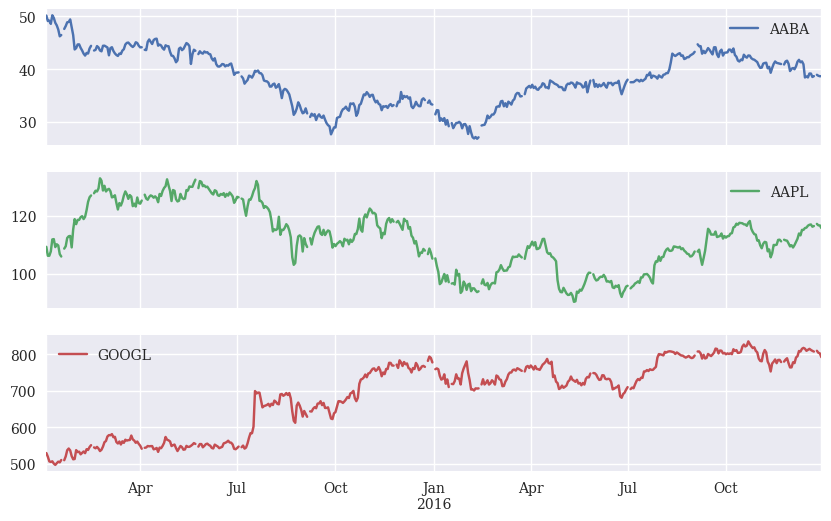

In [75]:
dates = pd.date_range('2015-01-02','2016-12-31',freq='B')
symbols = ['AABA','AAPL','GOOGL']
df = stocks_data(symbols, dates)
df.fillna(method='pad')
df.plot(figsize=(10, 6), subplots=True);

In [76]:
df.head()

,AABA,AAPL,GOOGL
2015-01-02,50.17,109.33,529.55
2015-01-05,49.13,106.25,519.46
2015-01-06,49.21,106.26,506.64
2015-01-07,48.59,107.75,505.15
2015-01-08,50.23,111.89,506.91


file_path_appl  archive/AAPL_2006-01-01_to_2018-01-01.csv


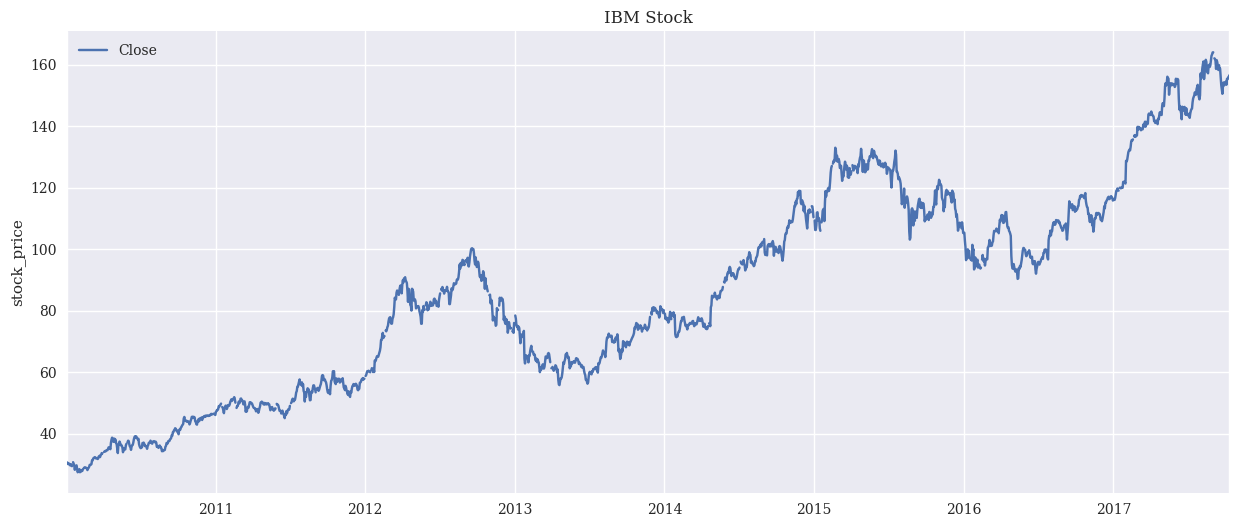

In [77]:
dates = pd.date_range('2010-01-02','2017-10-11',freq='B')
df1=pd.DataFrame(index=dates)
file_path_appl = "archive/{}_2006-01-01_to_2018-01-01.csv".format("AAPL")
print('file_path_appl ', file_path_appl)
df_ibm=pd.read_csv(file_path_appl, parse_dates=True, index_col=0)
df_ibm=df1.join(df_ibm)
df_ibm[['Close']].plot(figsize=(15, 6))
plt.ylabel("stock_price")
plt.title("IBM Stock")
plt.show()

In [31]:
df_ibm

,Open,High,Low,Close,Volume,Name
2010-01-04,30.49,30.64,30.34,30.57,123432050.0,AAPL
2010-01-05,30.66,30.80,30.46,30.63,150476004.0,AAPL
2010-01-06,30.63,30.75,30.11,30.14,138039594.0,AAPL
2010-01-07,30.25,30.29,29.86,30.08,119282324.0,AAPL
2010-01-08,30.04,30.29,29.87,30.28,111969081.0,AAPL
...,...,...,...,...,...,...
2017-10-05,154.18,155.44,154.05,155.39,21283769.0,AAPL
2017-10-06,154.97,155.49,154.56,155.30,17407558.0,AAPL
2017-10-09,155.81,156.73,155.48,155.84,16262923.0,AAPL
2017-10-10,156.06,158.00,155.10,155.90,15617014.0,AAPL


In [61]:
X = df_ibm[['Open', 'High']]
y = df_ibm[['Close']]

In [62]:
X

,Open,High
2010-01-04,30.49,30.64
2010-01-05,30.66,30.80
2010-01-06,30.63,30.75
2010-01-07,30.25,30.29
2010-01-08,30.04,30.29
...,...,...
2017-10-05,154.18,155.44
2017-10-06,154.97,155.49
2017-10-09,155.81,156.73
2017-10-10,156.06,158.00


In [63]:
y

,Close
2010-01-04,30.57
2010-01-05,30.63
2010-01-06,30.14
2010-01-07,30.08
2010-01-08,30.28
...,...
2017-10-05,155.39
2017-10-06,155.30
2017-10-09,155.84
2017-10-10,155.90


In [78]:
df_ibm=df_ibm[['Close']]
df_ibm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2028 entries, 2010-01-04 to 2017-10-11
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1957 non-null   float64
dtypes: float64(1)
memory usage: 96.2 KB


In [79]:
df_ibm=df_ibm.fillna(method='ffill')

scaler = MinMaxScaler(feature_range=(-1, 1))
df_ibm['Close'] = scaler.fit_transform(df_ibm['Close'].values.reshape(-1,1))

In [80]:
df_ibm

,Close
2010-01-04,-0.954176
2010-01-05,-0.953298
2010-01-06,-0.960471
2010-01-07,-0.961350
2010-01-08,-0.958422
...,...
2017-10-05,0.873216
2017-10-06,0.871898
2017-10-09,0.879804
2017-10-10,0.880682


In [81]:
def load_data(stock, look_back):
    data_raw = stock.values # convert to numpy array
    data = []
    
    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index: index + look_back])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

look_back = 60 # choose sequence length
x_train, y_train, x_test, y_test = load_data(df_ibm, look_back)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1574, 59, 1)
y_train.shape =  (1574, 1)
x_test.shape =  (394, 59, 1)
y_test.shape =  (394, 1)


In [82]:
x_train[0]

array([[-0.95417612],
       [-0.95329771],
       [-0.96047141],
       [-0.96134983],
       [-0.95842178],
       [-0.96222824],
       [-0.96735232],
       [-0.96120343],
       [-0.96369226],
       [-0.97101237],
       [-0.97101237],
       [-0.95198009],
       [-0.95886099],
       [-0.96662031],
       [-0.98814142],
       [-0.97701486],
       [-0.97101237],
       [-0.96691311],
       [-0.98492058],
       [-1.        ],
       [-0.99443672],
       [-0.99209428],
       [-0.98506698],
       [-1.        ],
       [-0.9929727 ],
       [-0.99575434],
       [-0.99136227],
       [-0.99370471],
       [-0.9862382 ],
       [-0.98257814],
       [-0.98257814],
       [-0.97628285],
       [-0.97803967],
       [-0.97730766],
       [-0.9799429 ],
       [-0.98257814],
       [-0.98960545],
       [-0.98213894],
       [-0.97921089],
       [-0.97379401],
       [-0.96457068],
       [-0.96486348],
       [-0.96398507],
       [-0.96105702],
       [-0.94378157],
       [-0

In [68]:
def split_data(X, y, look_back):
    X_data = []
    y_data = []
    
    # create all possible sequences of length look_back
    for index in range(len(X) - look_back): 
        X_data.append(X[index: index + look_back])
        y_data.append(y[index: index + look_back])
    
    X_data = np.array(X_data);
    y_data = np.array(y_data);

    test_set_size = int(np.round(0.2*X_data.shape[0]));
    train_set_size = X_data.shape[0] - (test_set_size);
    
    x_train = X_data[:train_set_size,:-1,:]
    y_train = y_data[:train_set_size,-1,:]
    
    x_test = X_data[train_set_size:,:-1]
    y_test = y_data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

look_back = 60 # choose sequence length
x_train_2, y_train_2, x_test_2, y_test_2 = split_data(X, y, look_back)
print('x_train.shape = ',x_train_2.shape)
print('y_train.shape = ',y_train_2.shape)
print('x_test.shape = ',x_test_2.shape)
print('y_test.shape = ',y_test_2.shape)

x_train.shape =  (1574, 59, 2)
y_train.shape =  (1574, 1)
x_test.shape =  (394, 59, 2)
y_test.shape =  (394, 1)


In [69]:
x_train_2[0]

array([[30.49, 30.64],
       [30.66, 30.8 ],
       [30.63, 30.75],
       [30.25, 30.29],
       [30.04, 30.29],
       [30.4 , 30.43],
       [29.88, 29.97],
       [29.7 , 30.13],
       [30.02, 30.07],
       [30.13, 30.23],
       [  nan,   nan],
       [29.76, 30.74],
       [30.7 , 30.79],
       [30.3 , 30.47],
       [29.54, 29.64],
       [28.93, 29.24],
       [29.42, 30.53],
       [29.55, 30.08],
       [29.28, 29.36],
       [28.73, 28.89],
       [27.48, 28.  ],
       [27.99, 28.05],
       [27.88, 28.6 ],
       [28.1 , 28.34],
       [27.52, 28.  ],
       [27.96, 28.27],
       [28.06, 28.21],
       [27.98, 28.09],
       [27.84, 28.54],
       [28.3 , 28.81],
       [  nan,   nan],
       [28.85, 29.1 ],
       [29.17, 29.19],
       [28.8 , 29.13],
       [28.84, 29.03],
       [28.91, 28.93],
       [28.57, 28.76],
       [28.32, 28.78],
       [28.2 , 28.98],
       [28.91, 29.31],
       [29.39, 29.93],
       [29.99, 30.12],
       [29.85, 29.98],
       [29.

In [83]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [50]:
x_train = torch.from_numpy(x_train_2).type(torch.Tensor)
x_test = torch.from_numpy(x_test_2).type(torch.Tensor)
y_train = torch.from_numpy(y_train_2).type(torch.Tensor)
y_test = torch.from_numpy(y_test_2).type(torch.Tensor)

In [51]:
x_train[0]

tensor([[30.4900, 30.6400, 30.3400],
        [30.6600, 30.8000, 30.4600],
        [30.6300, 30.7500, 30.1100],
        [30.2500, 30.2900, 29.8600],
        [30.0400, 30.2900, 29.8700],
        [30.4000, 30.4300, 29.7800],
        [29.8800, 29.9700, 29.4900],
        [29.7000, 30.1300, 29.1600],
        [30.0200, 30.0700, 29.8600],
        [30.1300, 30.2300, 29.4100],
        [    nan,     nan,     nan],
        [29.7600, 30.7400, 29.6100],
        [30.7000, 30.7900, 29.9300],
        [30.3000, 30.4700, 29.6000],
        [29.5400, 29.6400, 28.1700],
        [28.9300, 29.2400, 28.6000],
        [29.4200, 30.5300, 28.9400],
        [29.5500, 30.0800, 28.5000],
        [29.2800, 29.3600, 28.3900],
        [28.7300, 28.8900, 27.1800],
        [27.4800, 28.0000, 27.3300],
        [27.9900, 28.0500, 27.6300],
        [27.8800, 28.6000, 27.7700],
        [28.1000, 28.3400, 27.3700],
        [27.5200, 28.0000, 27.2600],
        [27.9600, 28.2700, 27.7100],
        [28.0600, 28.2100, 27.8200],
 

In [84]:
y_train.size(),x_train.size()

(torch.Size([1574, 1]), torch.Size([1574, 59, 1]))

In [85]:


class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

In [86]:
input_dim = 1
hidden_dim = 32
num_layers = 3 
output_dim = 1

model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(1, 32, num_layers=3, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
14
torch.Size([128, 1])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([1, 32])
torch.Size([1])


In [87]:
num_epochs = 100
hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =look_back-1  

for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

Epoch  10 MSE:  0.16409538686275482
Epoch  20 MSE:  0.15012061595916748
Epoch  30 MSE:  0.12508590519428253
Epoch  40 MSE:  0.05412709340453148
Epoch  50 MSE:  0.0295900609344244
Epoch  60 MSE:  0.014792235568165779
Epoch  70 MSE:  0.00903420988470316
Epoch  80 MSE:  0.00648301700130105
Epoch  90 MSE:  0.004706762731075287


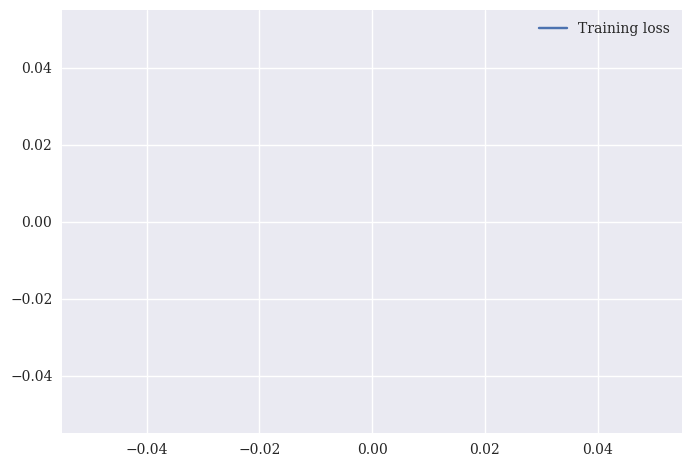

In [56]:
plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

In [26]:
# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.03 RMSE
Test Score: 0.11 RMSE


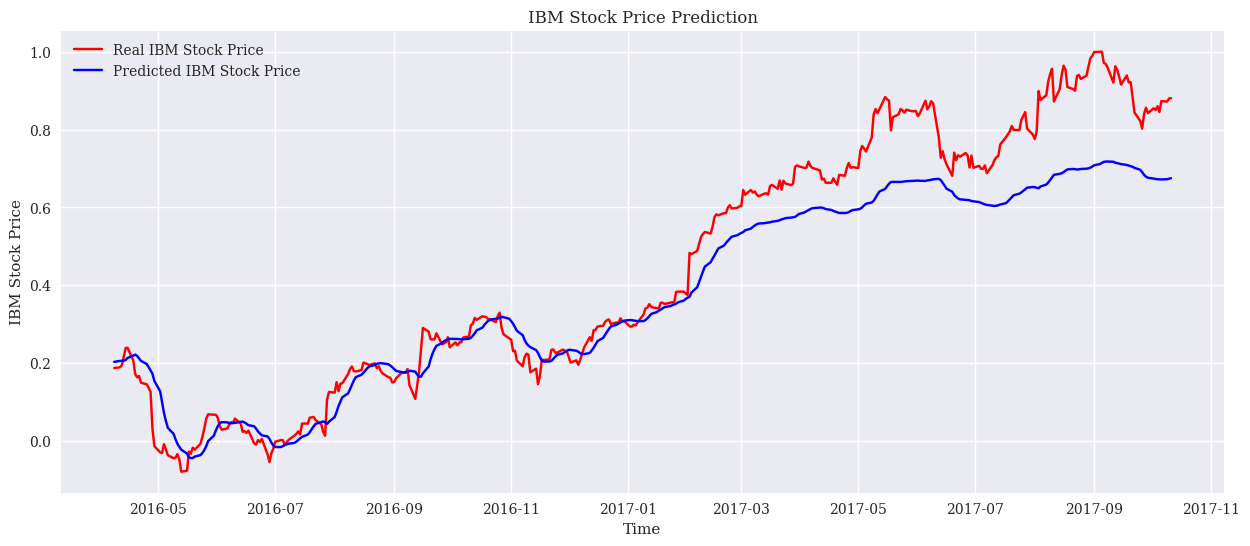

In [27]:
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(df_ibm[len(df_ibm)-len(y_test):].index, y_test, color = 'red', label = 'Real IBM Stock Price')
axes.plot(df_ibm[len(df_ibm)-len(y_test):].index, y_test_pred, color = 'blue', label = 'Predicted IBM Stock Price')
#axes.xticks(np.arange(0,394,50))
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.savefig('ibm_pred.png')
plt.show()